In [10]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from keras.models import Model
from keras.layers import Activation, Dense, Dropout, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten, concatenate
from keras.utils import to_categorical, plot_model
from keras.datasets import cifar10

# load cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [11]:
# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 3])
x_test = np.reshape(x_test,[-1, image_size, image_size, 3])
x_train = (x_train.astype('float32') - 127.5) / 127.5
x_test = (x_test.astype('float32') - 127.5) / 127.5

In [12]:

# network parameters
input_shape = (image_size, image_size, 3)
batch_size = 256
kernel_size = 3
filters = 64

In [13]:
# left branch of Y network
left_inputs = Input(shape=input_shape)
x = left_inputs
# 3 layers of Conv2D-MaxPooling2D
depth = 3
for i in range(depth):
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               padding='same',
               activation='elu')(x)
    
    if i < (depth - 1):
        x = MaxPooling2D()(x)

In [14]:
# right branch of Y network
right_inputs = Input(shape=input_shape)
y = right_inputs
# 3 layers of Conv2D-Dropout-MaxPooling2D
for i in range(depth):
    y = Conv2D(filters=filters,
               kernel_size=kernel_size,
               padding='same',
               activation='elu',
               dilation_rate=2)(y)
    if i < (depth - 1):
        y = MaxPooling2D()(y)

In [15]:
# merge left and right branches outputs
y = concatenate([x, y])
# feature maps to vector in preparation to connecting to Dense layer
y = Flatten()(y)
# y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)

# build the model in functional API
model = Model([left_inputs, right_inputs], outputs, name='Y_Network')
# verify the model using graph
# plot_model(model, to_file='cnn-y-network.png', show_shapes=True)
# verify the model using layer text description
model.summary()

Model: "Y_Network"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 32, 32, 64)   1792        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 32, 32, 64)   1792        input_4[0][0]                    
__________________________________________________________________________________________

In [16]:

# classifier loss, Adam optimizer, classifier accuracy
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the model with input images and labels
history = model.fit([x_train, x_train],
          y_train, 
          validation_data=([x_test, x_test], y_test),
          epochs=20,
          batch_size=batch_size)

# model accuracy on test dataset
score = model.evaluate([x_test, x_test], y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Epoch 1/20
196/196 [==============================] - 299s 2s/step - loss: 1.9981 - accuracy: 0.3048 - val_loss: 1.8462 - val_accuracy: 0.3746
Epoch 2/20
196/196 [==============================] - 330s 2s/step - loss: 1.7771 - accuracy: 0.3909 - val_loss: 1.6992 - val_accuracy: 0.4195
Epoch 3/20
196/196 [==============================] - 289s 1s/step - loss: 1.6538 - accuracy: 0.4315 - val_loss: 1.6034 - val_accuracy: 0.4419
Epoch 4/20
196/196 [==============================] - 281s 1s/step - loss: 1.5737 - accuracy: 0.4565 - val_loss: 1.5510 - val_accuracy: 0.4571
Epoch 5/20
196/196 [==============================] - 280s 1s/step - loss: 1.5126 - accuracy: 0.4746 - val_loss: 1.4830 - val_accuracy: 0.4779
Epoch 6/20
196/196 [==============================] - 272s 1s/step - loss: 1.4548 - accuracy: 0.4929 - val_loss: 1.4257 - val_accuracy: 0.5010
Epoch 7/20
196/196 [==============================] - 269s 1s/step - loss: 1.4019 - accuracy: 0.5119 - val_loss: 1.3928 - val_accuracy: 0.5085

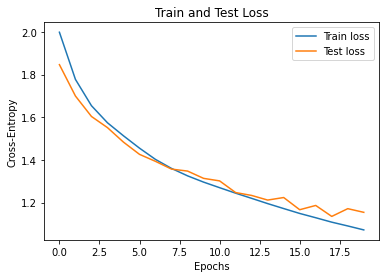

In [17]:
import matplotlib.pyplot as plt

# Plot history: Loss and accuracy
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

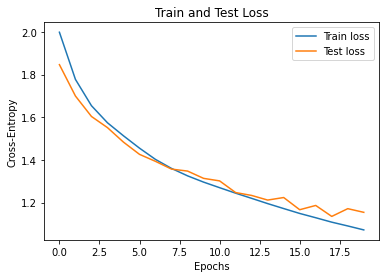

In [18]:
import matplotlib.pyplot as plt

# Plot history: Loss and accuracy
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()